### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import tensorflow as tf
from tensorflow import keras

/Applications/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reading csv files for 3 items(synapse extract)

In [2]:
items = pd.read_csv("../data/CompleteList.csv") 

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
items.head()

,ORGANIZATION_CODE,ORGANIZATION_ID,PARTITION_ID,TRANSACTION_ID,TRANSACTION_DATE,ITEM_NUMBER,GL_LOCATION,GL_ACCOUNT,GL_DEPARTMENT,GL_PCL,...,PRIMARY_UNIT_OF_MEASURE,TRANSACTION_SOURCE_TYPE_NAME,TRANSACTION_TYPE_NAME,TRANSACTION_ACTION,SUBINVENTORY_CODE,LOCATOR,LPN,TRANSFER_LPN,TRANSFER_ORG,TRANSFER_SUBINVENTORY
0,STN,87,289,144696799,2013-08-14T08:40:14.0000000,844600,25,41000,0,76,...,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,NaN,NaN,NaN,NaN,NaN
1,STN,87,289,144988032,2013-08-16T15:16:10.0000000,844600,25,41000,0,76,...,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,NaN,NaN,NaN,NaN,NaN
2,STN,87,289,144988050,2013-08-16T15:19:22.0000000,844600,25,41000,0,76,...,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,NaN,NaN,NaN,NaN,NaN
3,STN,87,289,144989708,2013-08-16T17:04:11.0000000,844600,25,41000,0,76,...,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,NaN,NaN,NaN,NaN,NaN
4,STN,87,289,144989744,2013-08-16T17:09:59.0000000,844600,25,41000,0,76,...,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,NaN,NaN,NaN,NaN,NaN


In [4]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77409 entries, 0 to 77408
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORGANIZATION_CODE             77409 non-null  object 
 1   ORGANIZATION_ID               77409 non-null  int64  
 2   PARTITION_ID                  77409 non-null  int64  
 3   TRANSACTION_ID                77409 non-null  int64  
 4   TRANSACTION_DATE              77409 non-null  object 
 5   ITEM_NUMBER                   77409 non-null  int64  
 6   GL_LOCATION                   77409 non-null  int64  
 7   GL_ACCOUNT                    77409 non-null  int64  
 8   GL_DEPARTMENT                 77409 non-null  int64  
 9   GL_PCL                        77409 non-null  int64  
 10  PARENT_TRANSACTION_ID         0 non-null      float64
 11  DEPARTMENT_CODE               73185 non-null  object 
 12  ACTUAL_COST                   77409 non-null  float64
 13  C

### Eliminating unnecessary columns

In [5]:
drop_columns = ['ORGANIZATION_ID','PARTITION_ID','GL_PCL','PARENT_TRANSACTION_ID','CURRENCY_CODE','SERIAL_NUMBERS',
               'TRANSACTION_SOURCE_NAME','SHIPMENT_NUMBER','TRANSFER_TRANSACTION_ID','TRANSFER_LOCATOR','LPN','TRANSFER_LPN',
               'TRANSFER_ORG','TRANSFER_SUBINVENTORY']
items = items.drop(drop_columns,axis=1)

In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77409 entries, 0 to 77408
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORGANIZATION_CODE             77409 non-null  object 
 1   TRANSACTION_ID                77409 non-null  int64  
 2   TRANSACTION_DATE              77409 non-null  object 
 3   ITEM_NUMBER                   77409 non-null  int64  
 4   GL_LOCATION                   77409 non-null  int64  
 5   GL_ACCOUNT                    77409 non-null  int64  
 6   GL_DEPARTMENT                 77409 non-null  int64  
 7   DEPARTMENT_CODE               73185 non-null  object 
 8   ACTUAL_COST                   77409 non-null  float64
 9   GL_COMPANY                    77409 non-null  int64  
 10  TRANSACTION_SOURCE_ID         77409 non-null  int64  
 11  SOURCE_CODE                   77388 non-null  object 
 12  SOURCE_LINE_ID                77388 non-null  float64
 13  P

In [7]:
unequalColumns = ['DEPARTMENT_CODE','LOCATOR','SOURCE_CODE','SOURCE_LINE_ID']
items = items.drop(unequalColumns,axis=1)

In [8]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77409 entries, 0 to 77408
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORGANIZATION_CODE             77409 non-null  object 
 1   TRANSACTION_ID                77409 non-null  int64  
 2   TRANSACTION_DATE              77409 non-null  object 
 3   ITEM_NUMBER                   77409 non-null  int64  
 4   GL_LOCATION                   77409 non-null  int64  
 5   GL_ACCOUNT                    77409 non-null  int64  
 6   GL_DEPARTMENT                 77409 non-null  int64  
 7   ACTUAL_COST                   77409 non-null  float64
 8   GL_COMPANY                    77409 non-null  int64  
 9   TRANSACTION_SOURCE_ID         77409 non-null  int64  
 10  PRIMARY_QUANTITY              77409 non-null  float64
 11  PRIMARY_UNIT_OF_MEASURE       77409 non-null  object 
 12  TRANSACTION_SOURCE_TYPE_NAME  77409 non-null  object 
 13  T

### Visualizing and understanding data

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


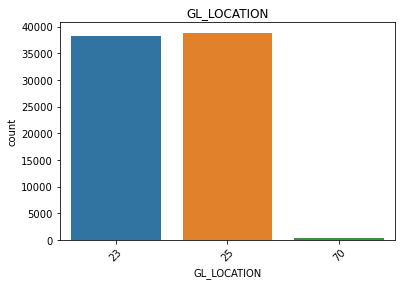

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


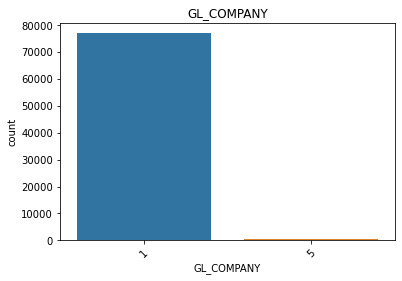

In [9]:
for cols in ['GL_LOCATION','GL_COMPANY']:
    sns.countplot(items[cols])
    plt.title(cols)
    plt.xticks(rotation = 45)
    plt.show()

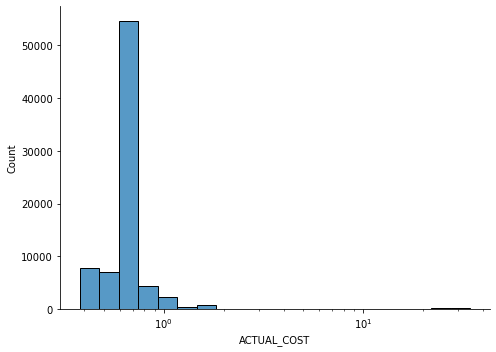

In [10]:
sns.displot(data=items,x="ACTUAL_COST",kind="hist",aspect=1.4,
           log_scale=10,bins=20)

In [11]:
items.corr()

,TRANSACTION_ID,ITEM_NUMBER,GL_LOCATION,GL_ACCOUNT,GL_DEPARTMENT,ACTUAL_COST,GL_COMPANY,TRANSACTION_SOURCE_ID,PRIMARY_QUANTITY
TRANSACTION_ID,1.000000,0.031314,0.210953,NaN,NaN,0.144885,0.125933,0.944669,-0.173768
ITEM_NUMBER,0.031314,1.000000,0.010723,NaN,NaN,0.026103,-0.003357,0.039706,-0.388503
GL_LOCATION,0.210953,0.010723,1.000000,NaN,NaN,0.929151,0.956667,0.174361,-0.177335
GL_ACCOUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GL_DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACTUAL_COST,0.144885,0.026103,0.929151,NaN,NaN,1.000000,0.973064,0.091546,-0.073101
GL_COMPANY,0.125933,-0.003357,0.956667,NaN,NaN,0.973064,1.000000,0.082255,-0.058512
TRANSACTION_SOURCE_ID,0.944669,0.039706,0.174361,NaN,NaN,0.091546,0.082255,1.000000,-0.181820
PRIMARY_QUANTITY,-0.173768,-0.388503,-0.177335,NaN,NaN,-0.073101,-0.058512,-0.181820,1.000000


<AxesSubplot:>

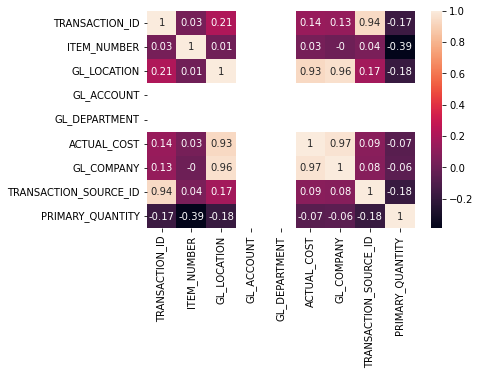

In [12]:
sns.heatmap(np.round(items.corr(),2), annot=True)

### Splitting date time field into different fields

In [13]:
items['TRANSACTION_DATE']

0        2013-08-14T08:40:14.0000000
1        2013-08-16T15:16:10.0000000
2        2013-08-16T15:19:22.0000000
3        2013-08-16T17:04:11.0000000
4        2013-08-16T17:09:59.0000000
                    ...             
77404    2021-09-03T06:31:37.0000000
77405    2021-09-03T06:37:31.0000000
77406    2021-09-03T10:52:59.0000000
77407    2021-09-03T11:09:33.0000000
77408    2021-09-03T11:57:22.0000000
Name: TRANSACTION_DATE, Length: 77409, dtype: object

In [14]:
items['DATE'] = pd.to_datetime(items['TRANSACTION_DATE']).dt.date

In [15]:
items['TIME'] = pd.to_datetime(items['TRANSACTION_DATE']).dt.time

In [21]:
items['SOLDUNITS'] = items['PRIMARY_QUANTITY'].apply(lambda x : abs(x))

In [22]:
items.head()

,ORGANIZATION_CODE,TRANSACTION_ID,TRANSACTION_DATE,ITEM_NUMBER,GL_LOCATION,GL_ACCOUNT,GL_DEPARTMENT,ACTUAL_COST,GL_COMPANY,TRANSACTION_SOURCE_ID,PRIMARY_QUANTITY,PRIMARY_UNIT_OF_MEASURE,TRANSACTION_SOURCE_TYPE_NAME,TRANSACTION_TYPE_NAME,TRANSACTION_ACTION,SUBINVENTORY_CODE,DATE,TIME,SOLDUNITS
0,STN,144696799,2013-08-14T08:40:14.0000000,844600,25,41000,0,0.39425,1,4435091,-2.85714,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,2013-08-14,08:40:14,2.85714
1,STN,144988032,2013-08-16T15:16:10.0000000,844600,25,41000,0,0.39425,1,4439094,-15.60000,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,2013-08-16,15:16:10,15.60000
2,STN,144988050,2013-08-16T15:19:22.0000000,844600,25,41000,0,0.39425,1,4439093,-15.60000,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,2013-08-16,15:19:22,15.60000
3,STN,144989708,2013-08-16T17:04:11.0000000,844600,25,41000,0,0.39425,1,4437499,-716.91429,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,2013-08-16,17:04:11,716.91429
4,STN,144989744,2013-08-16T17:09:59.0000000,844600,25,41000,0,0.39425,1,4437498,-153.14286,POUND,Job or Schedule,WIP Issue,Issue from stores,LC16,2013-08-16,17:09:59,153.14286


In [25]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77409 entries, 0 to 77408
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORGANIZATION_CODE             77409 non-null  object 
 1   TRANSACTION_ID                77409 non-null  int64  
 2   TRANSACTION_DATE              77409 non-null  object 
 3   ITEM_NUMBER                   77409 non-null  int64  
 4   GL_LOCATION                   77409 non-null  int64  
 5   GL_ACCOUNT                    77409 non-null  int64  
 6   GL_DEPARTMENT                 77409 non-null  int64  
 7   ACTUAL_COST                   77409 non-null  float64
 8   GL_COMPANY                    77409 non-null  int64  
 9   TRANSACTION_SOURCE_ID         77409 non-null  int64  
 10  PRIMARY_QUANTITY              77409 non-null  float64
 11  PRIMARY_UNIT_OF_MEASURE       77409 non-null  object 
 12  TRANSACTION_SOURCE_TYPE_NAME  77409 non-null  object 
 13  T

In [28]:
df = items[['ITEM_NUMBER','DATE','TIME','SOLDUNITS']].copy()

In [29]:
#occur = items.groupby(['DATE','ITEM_NUMBER'])['DATE'].count()

In [30]:
#occur

In [31]:
#df = occur.to_frame()

In [32]:
df

,ITEM_NUMBER,DATE,TIME,SOLDUNITS
0,844600,2013-08-14,08:40:14,2.85714
1,844600,2013-08-16,15:16:10,15.60000
2,844600,2013-08-16,15:19:22,15.60000
3,844600,2013-08-16,17:04:11,716.91429
4,844600,2013-08-16,17:09:59,153.14286
...,...,...,...,...
77404,335158200,2021-09-03,06:31:37,1311.13636
77405,335158200,2021-09-03,06:37:31,1564.11364
77406,335158200,2021-09-03,10:52:59,408.68182
77407,335158200,2021-09-03,11:09:33,408.68182


In [33]:
df.to_csv('occurences.csv')

## END ##